# Tree appoach

## Import library
 

- *pandas* for managing data frame efficiently
- *matplotlib* for visualizing data
- *seaborn* provides various fascinating themes for visualization
- *numpy* for working with array
- *sklearn* provides some evaluate metrics, fast-used machine learning algorithms, choosing good hyperparameters
- *h2o* provides "Extended Isolation Forest" algorithm
-> For more details, go to "https://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/eif.html"
-> For better understanding algorithm, go to "https://arxiv.org/abs/1811.02141"

In [1]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 19 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=3db1ca2d267da5a88554754ef7ccaafb5aead56a70dea49071b770a7bc12be77
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, ShuffleSplit
import h2o
from h2o.estimators import H2OExtendedIsolationForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpym435zk8
  JVM stdout: /tmp/tmpym435zk8/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpym435zk8/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_cgbibn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Importing data

In [13]:
df = pd.read_csv('my_data.csv')
X_train = pd.read_csv('X_train.csv').drop(columns=['country'])
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test.csv').drop(columns=['country'])
y_test = pd.read_csv('y_test.csv')

## Exploratory analysis


### Removing linear correlated features


In [14]:
#Observing the statistical information of numerical columns in the data 
X_train.describe()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,...,thinness_5_9_years,income_composition_of_resources,schooling,status_Developed,status_Developing,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
count,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,2007.550024,163.784773,30.890190,4.629194,729.941698,80.825034,2488.181064,38.305969,43.047828,82.501734,...,4.852054,0.627866,12.017971,0.177648,0.822352,0.290874,0.183992,0.252318,0.213763,0.059053
std,4.632549,122.143019,117.699358,3.926122,1951.746016,22.751766,11891.273028,19.935305,161.664646,23.207281,...,4.521714,0.203551,3.260015,0.382309,0.382309,0.454276,0.387572,0.434449,0.410061,0.235782
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.400000,0.000000,3.000000,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,74.000000,0.000000,1.110000,5.889526,80.940461,0.000000,19.300000,0.000000,78.000000,...,1.500000,0.497000,10.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,144.000000,3.000000,4.200000,67.639253,87.000000,15.000000,43.000000,4.000000,93.000000,...,3.300000,0.663000,12.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,225.000000,21.000000,7.400000,434.798502,96.000000,343.000000,56.100000,27.000000,97.000000,...,7.100000,0.773000,14.100000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2015.000000,693.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,...,28.600000,0.948000,20.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


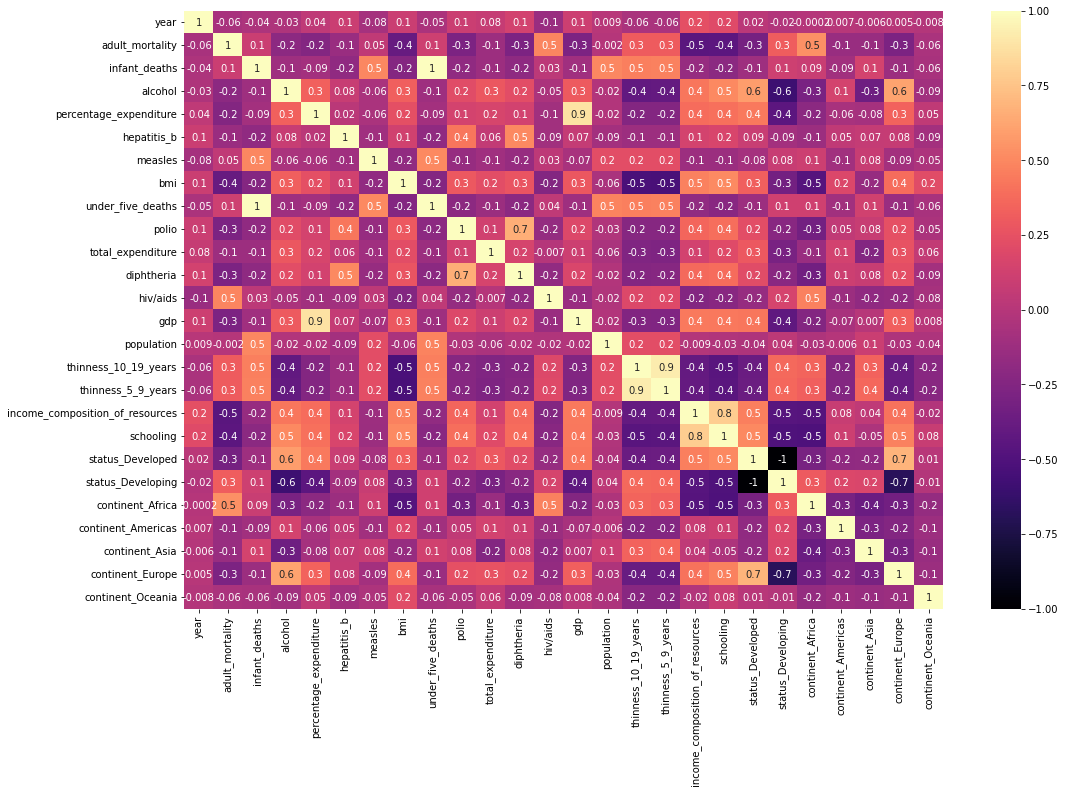

In [15]:
#Observing the correlation between each feature in the data
plt.figure(figsize=(17,11))
sns.heatmap(X_train.corr(), annot=True, cmap="magma", fmt='.1g')

- "under_five_deaths" and "infant_deaths" have correlation of 1.0
- "thinness_5_9_years" and "thinness_10_19_years" have correlation of 0.9
- "schooling" and "income_composition_of_resources" have correlation of 0.8
- "gdp" and "percentage_expenditure" have correlation of 0.9

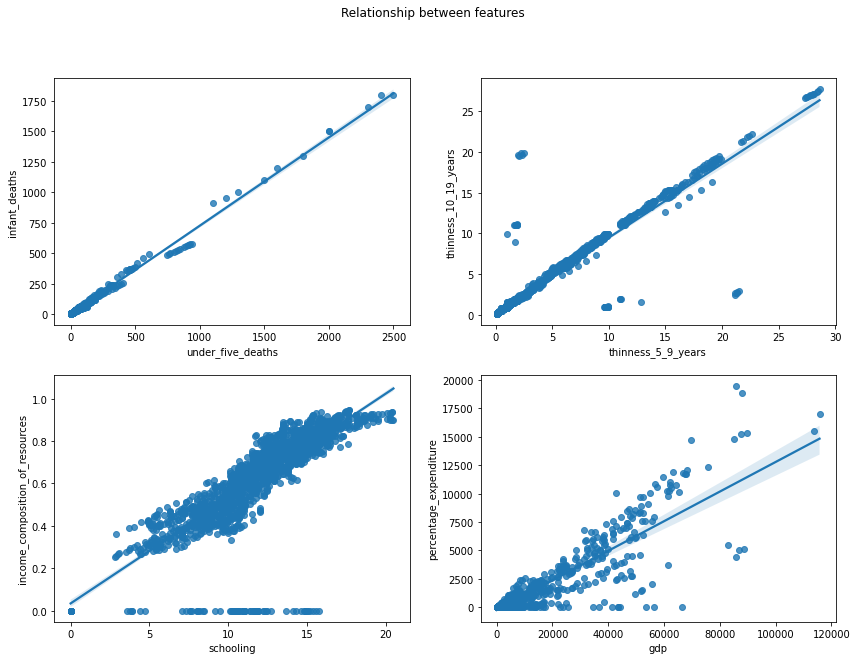

In [16]:
#Plot graph to see relationship between these features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship between features')

sns.regplot(ax=axes[0,0], x=X_train['under_five_deaths'], y=X_train['infant_deaths'])

sns.regplot(ax=axes[0,1], x=X_train['thinness_5_9_years'], y=X_train['thinness_10_19_years'])

sns.regplot(ax=axes[1,0], x=X_train['schooling'], y=X_train['income_composition_of_resources'])

sns.regplot(ax=axes[1,1], x=X_train['gdp'], y=X_train['percentage_expenditure'])


- "infant_deaths" and "under_five_deaths" almost have linear relationship with each other, thus can remove 1 in 2, we choose "under_five_deaths".
- "thinness_5_9_years" and "thinness_10_19_years" almost have linear relationship with each other, thus can remove 1 in 2, we choose "thinness_10_19_years".
- "schooling" and "income_composition_of_resources" might be linearly correlated, but some data points don't follow that, so we haven't concluded yet.
- Linear line between "gdp" and "percentage_expenditure" seems fluctuate around an angle, we haven't concluded yet.  

In [17]:
columns_drop = ["under_five_deaths", "thinness_10_19_years"]

### Relationship between explanatory vars and response var

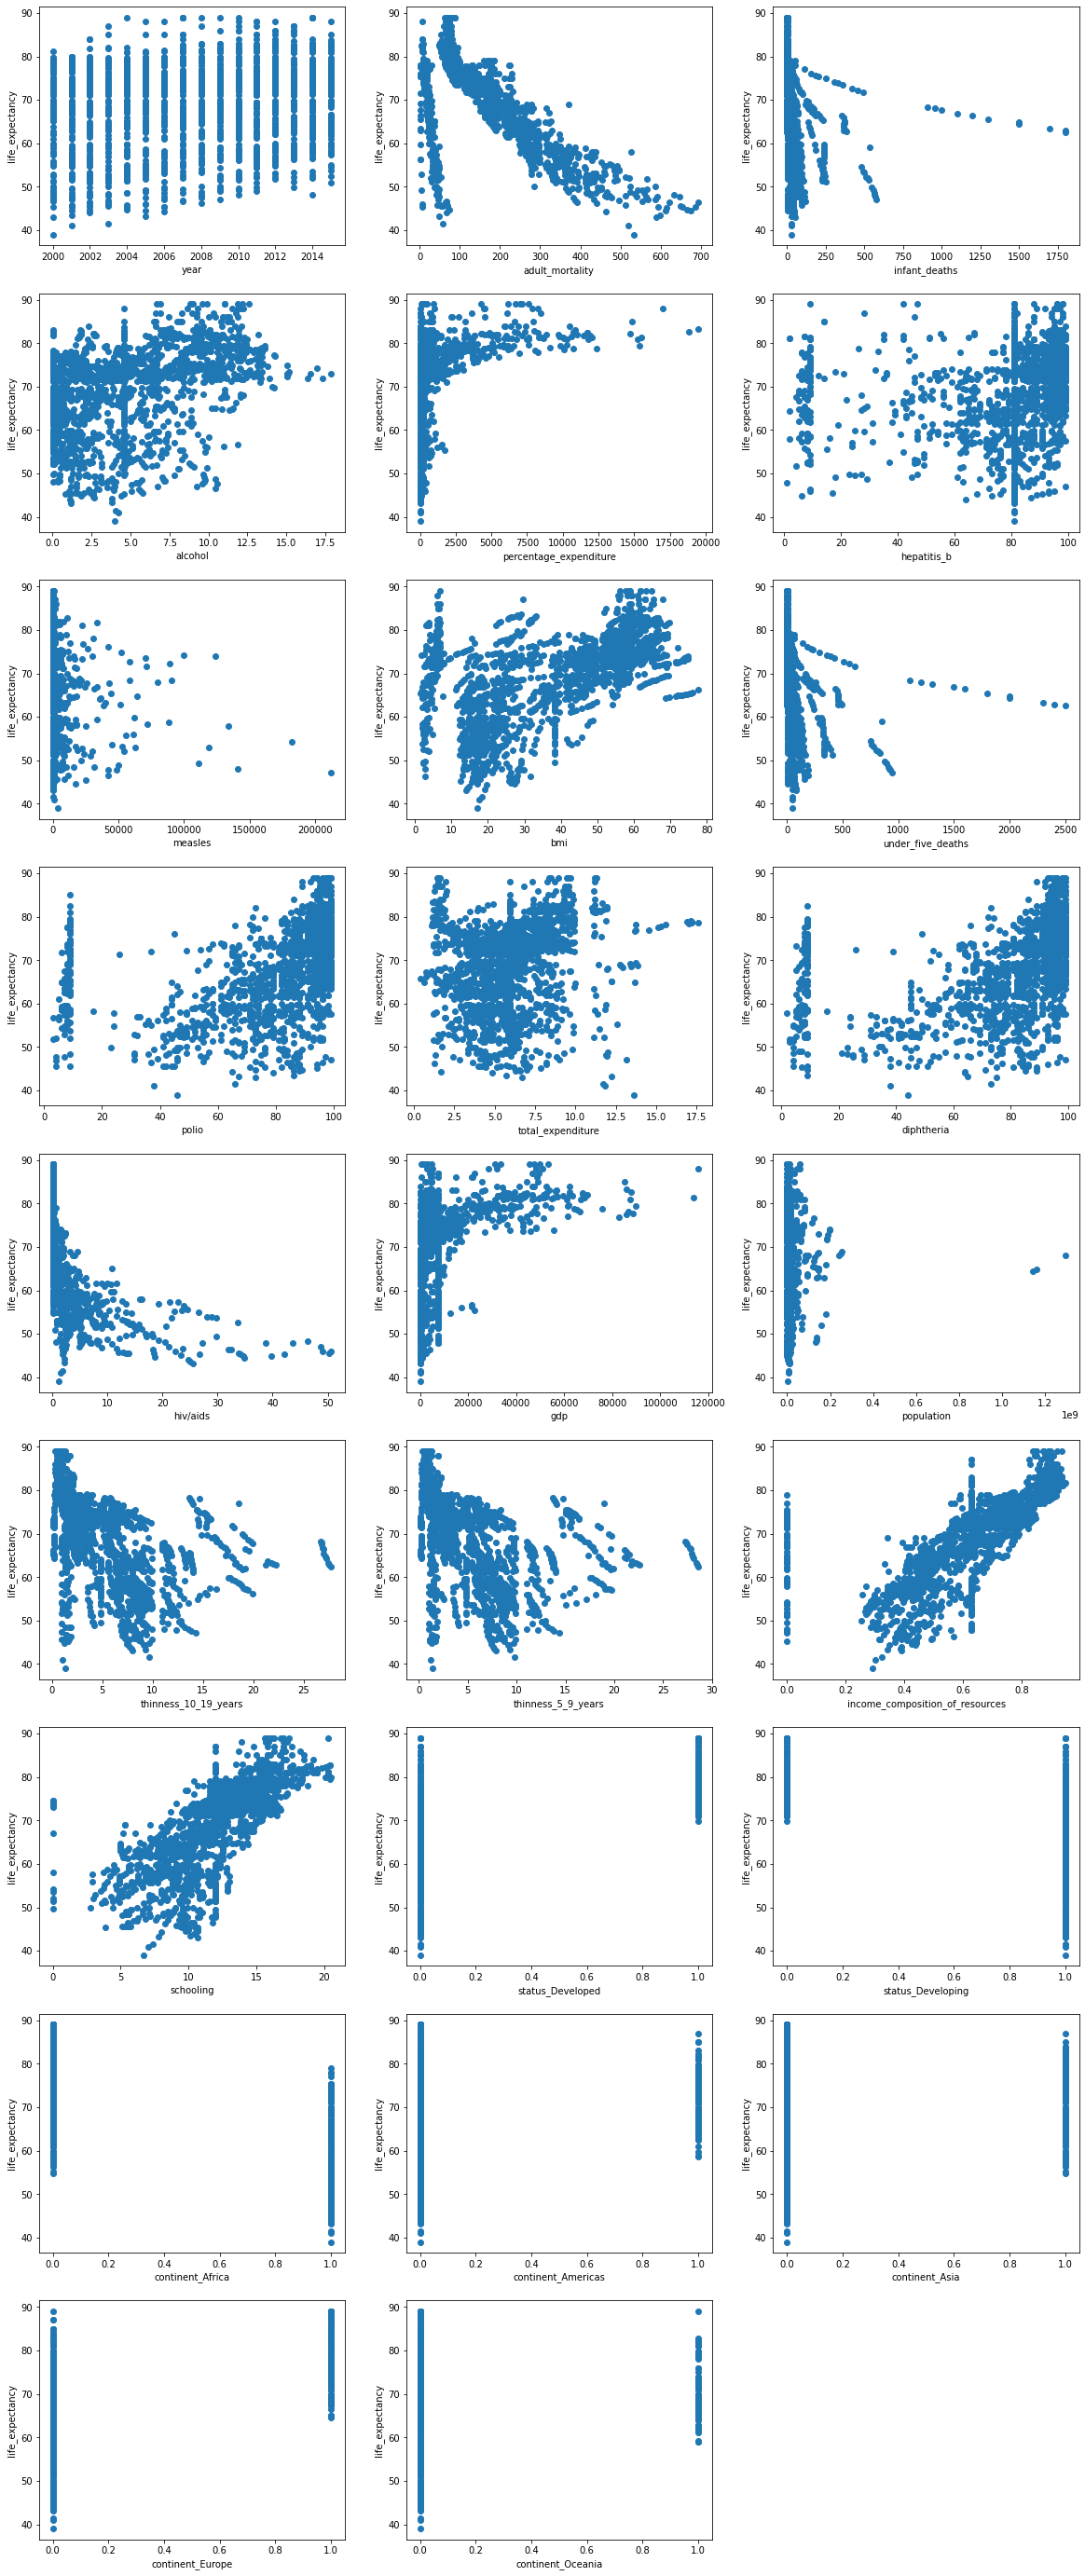

In [18]:
fig.suptitle('Relationship between attributes and label')
plt.figure(figsize=(20,50))
for idx, col in enumerate(X_train.columns):
    plt.subplot(X_train.shape[1]//3+1, 3, idx+1)
    plt.plot(X_train[col], y_train, 'o')
    plt.xlabel(col)
    plt.ylabel(y_train.columns[0])

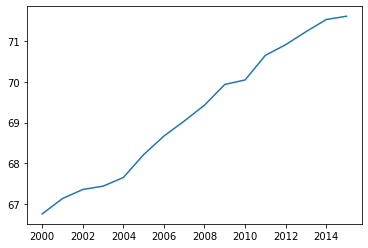

In [19]:
plt.plot(df.groupby(['year']).life_expectancy.mean())

- "gdp" doesn't show linear relationship with "life_expectancy", hence can remove.
- "percentage_expenditure" doesn't show linear relationship with "life_expectancy", hence can remove.

In [20]:
#dropping 'under_five_deaths', 'thinness_5_9_years' columns
columns_drop += ['percentage_expenditure', 'gdp']

### Some helpful functions

- Functions to support feature selection
1.  feature_importance: visualize data frame for importances of every feature considered.
2.  pprint: calculate three model scores including r2 score (r2), root mean square error (rmse), mean absolute error (mae), show feature importances.
3.  compare_loss: Compare model scores, feature importances before and after dropping features.

In [21]:
#testing the loss in accuracy before and after removing features 

#making dataframe for feature importances
def feature_importance(model, x_train):
  importance = model.feature_importances_ 
  feature_importance = pd.DataFrame(importance, index=x_train.columns, columns=['Importances'])
  return feature_importance.sort_values(by=['Importances'], ascending=False)

def score(y_test, y_pred, score_show=False, feature_importance_df=None, importance_show=False, return_score=False):
  r2 = r2_score(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  if score_show:
    print(f'r2 score: {r2}')
    print(f'rmse: {rmse}')
    print(f'mae: {mae}')
    if importance_show:
      print('Importances of features:')
      print(feature_importance_df)
  if return_score:    
    return r2, rmse, mae

#comparing different scores
def compare_loss(X_train, y_train, X_test, y_test, columns=[], estimator='RF', random_state=15, show_org=False):
  assert len(columns) != 0, "Please input the columns you want to drop before compare"
  X_train_dropped = X_train.drop(columns=columns, axis=1)
  X_test_dropped = X_test.drop(columns=columns, axis=1)
  if estimator == 'RF':
    #original data
    training = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=random_state)

    #dropping column
    training_dropped = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=random_state)

  if estimator == 'DT':
    #original data
    training = DecisionTreeRegressor(random_state=random_state)
    
    #dropping column
    training_dropped = DecisionTreeRegressor(random_state=random_state)
  
  training.fit(X_train, y_train)
  feature_importance_df = feature_importance(training, X_train)
  pred = training.predict(X_test)
  
  #compute score for original data
  if show_org:
    print('Original:')
    score(y_test, pred, score_show=True, feature_importance_df=feature_importance_df, importance_show=True)
    
    print('<------------------------------------------------------------------------------------------------------------>')
  
  training_dropped.fit(X_train_dropped, y_train)
  feature_importance_df_dropped = feature_importance(training_dropped, X_train_dropped)
  pred = training_dropped.predict(X_test_dropped)
  
  #compute score for dropped data
  print('Dropped:')
  score(y_test, pred, score_show=True, feature_importance_df=feature_importance_df_dropped, importance_show=True)

- Functions to support detecting anomaly data points
1.  num_anomaly: count number of anomaly data points depending on threshold (> 0.5 and < 1).
2.  evaluate: check improvement in test data (split from original train data).

In [22]:
#counting number of anomaly data points
def num_anomaly(anomaly_score, threshold):
  bool_val = anomaly_score > threshold
  print(f'Number of anomaly data points with threshold {threshold}: {bool_val.sum()}')

#evaluating score 
def evaluate(X_train, y_train, X_test, y_test, 
             estimator, anomaly_score, columns_drop=[], threshold=0.6, random_state=15, 
             n_estimators=100, max_features='sqrt', score_show=False):
  num_anomaly(anomaly_score=anomaly_score, threshold=threshold)

  if estimator == 'DT':
    Life_Tree = DecisionTreeRegressor(random_state=random_state)
  if estimator == 'RF':
    Life_Tree = DecisionTreeRegressor(n_estimators=n_estimators, max_features=max_features, random_state=random_state)

  Life_Tree.fit(X_train.loc[anomaly_score <= threshold], y_train.loc[anomaly_score <= threshold])
  pred = Life_Tree.predict(X_test.drop(columns=columns_drop))
  r2, rmse, mae = score(y_test, pred, score_show=score_show, return_score=True)

  return r2, rmse, mae


## Decision Tree

### Outlier detecting

In [197]:
# Define an Extended Isolation forest model
X_train_dt = X_train.drop(columns=columns_drop)
X_train_dt['life_expectancy'] = y_train
eif_df = h2o.H2OFrame(X_train_dt)
X_train_dt.drop(columns=['life_expectancy'], inplace=True)

eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = eif_df.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = eif_df.columns, 
          training_frame = eif_df)

# Calculate score
eif_result = eif.predict(eif_df)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"].as_data_frame().values

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"].as_data_frame()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [198]:
r2 = -1
for thres in [0.5, 0.6, 0.7, 0.8, 0.9, 0.98]:
  r2_pred, rmse_pred, mae_pred = evaluate(X_train_dt, y_train, X_test, y_test, estimator='DT', anomaly_score=anomaly_score, columns_drop=columns_drop, threshold=thres, score_show=True)
  print('<------------------------------------------------------------------------------------------------>')
  if r2_pred > r2:
    r2 = r2_pred
    threshold = thres 

Number of anomaly data points with threshold 0.5: 225
r2 score: 0.8930732466602445
rmse: 9.985938566552905
mae: 1.8325369738339023
Number of anomaly data points with threshold 0.6: 82
r2 score: 0.904122066762135
rmse: 8.954084186575656
mae: 1.7604095563139932
Number of anomaly data points with threshold 0.7: 39
r2 score: 0.9074949414146283
rmse: 8.639089874857794
mae: 1.7515358361774742
Number of anomaly data points with threshold 0.8: 13
r2 score: 0.9076783981188559
rmse: 8.621956769055746
mae: 1.7017064846416385
Number of anomaly data points with threshold 0.9: 0
r2 score: 0.917006184809506
rmse: 7.750830489192266
mae: 1.636405005688282
Number of anomaly data points with threshold 0.98: 0
r2 score: 0.917006184809506
rmse: 7.750830489192266
mae: 1.636405005688282


In [199]:
X_train_dt_cleaned = X_train_dt.loc[anomaly_score <= threshold]
y_train_dt_cleaned = y_train[anomaly_score <= threshold]

print(X_train_dt_cleaned.shape[0])
print(y_train_dt_cleaned.shape[0])

2049
2049


### Selecting features

In [204]:
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='DT', show_org=True)

Original:
r2 score: 0.9163962460856894
rmse: 7.807792946530149
mae: 1.6224118316268488
Importances of features:
                                 Importances
hiv/aids                            0.585211
income_composition_of_resources     0.165641
adult_mortality                     0.111773
continent_Africa                    0.057514
under_five_deaths                   0.009849
alcohol                             0.008874
thinness_5_9_years                  0.008235
year                                0.007344
bmi                                 0.007012
thinness_10_19_years                0.006324
total_expenditure                   0.004866
polio                               0.004395
population                          0.004110
percentage_expenditure              0.003827
infant_deaths                       0.003186
schooling                           0.003103
diphtheria                          0.002683
hepatitis_b                         0.002089
measles                          

- Dropping features that have importance percentage < 1%

In [211]:
columns_drop_dt = columns_drop + ['alcohol',  'polio', 'diphtheria', 'bmi', 
                                  'continent_Asia', 'continent_Europe', 'continent_Oceania',
                                  'status_Developing',  'year', 'measles'] 
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop_dt, estimator='DT')

Dropped:
r2 score: 0.9262840264478763
rmse: 6.884368600682595
mae: 1.5012514220705346
Importances of features:
                                 Importances
hiv/aids                            0.587181
income_composition_of_resources     0.175770
adult_mortality                     0.115905
continent_Africa                    0.057811
thinness_5_9_years                  0.020248
infant_deaths                       0.014674
total_expenditure                   0.008740
schooling                           0.007250
hepatitis_b                         0.006153
population                          0.004090
continent_Americas                  0.002081
status_Developed                    0.000097


[Text(0.5, 0, 'adult_mortality'),
 Text(1.5, 0, 'hepatitis_b'),
 Text(2.5, 0, 'total_expenditure'),
 Text(3.5, 0, 'hiv/aids'),
 Text(4.5, 0, 'population'),
 Text(5.5, 0, 'thinness_5_9_years'),
 Text(6.5, 0, 'income_composition_of_resources'),
 Text(7.5, 0, 'continent_Africa')]

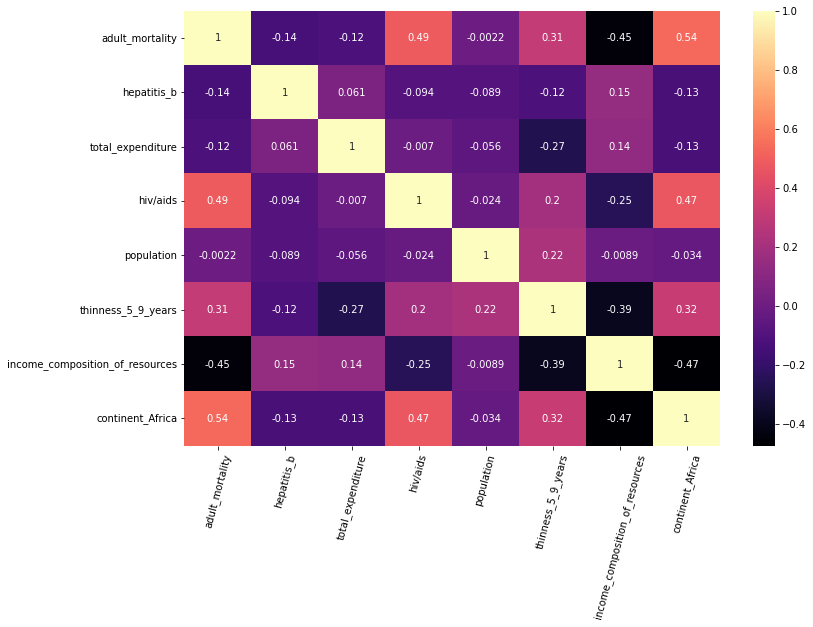

In [202]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop_dt).corr(), cmap='magma', annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

### Hyperparameter tunning

In [183]:
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
          'random_state':np.arange(15)}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params, scoring='r2', cv=cv_sets, verbose= 3, n_jobs=-1)
grid_search.fit(X_train_dt_cleaned, y_train_dt_cleaned)
grid_search = grid_search.best_estimator_

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [184]:
grid_search.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 7,
 'splitter': 'best'}

### Final training model and testing

In [186]:
Life_Tree = DecisionTreeRegressor(max_depth=9, random_state=7)
Life_Tree.fit(X_train_dt_cleaned, y_train_dt_cleaned)

print("Train score:")
pred = Life_Tree.predict(X_train_dt_cleaned)
score(y_test=y_train_dt_cleaned, y_pred=pred, score_show=True)
print('<-------------------------------------------------------------------------------------------------->')
print("Test score:")
pred = Life_Tree.predict(X_test.drop(columns=columns_drop_dt))
score(y_test=y_test, y_pred=pred, score_show=True)

Train score:
r2 score: 0.9709873099074807
rmse: 2.607516281310494
mae: 1.0435455893840246
<-------------------------------------------------------------------------------------------------->
Test score:
r2 score: 0.9126497229791545
rmse: 8.157682458850338
mae: 1.832444773064526


## Random Forest

- Dropping continent features

In [212]:
['population', 'year', 'hepatitis_b', 'measles', 'total_expenditure']

['population', 'year', 'hepatitis_b', 'measles', 'total_expenditure']

In [213]:
columns_drop += ['continent_Europe', 'continent_Asia', 'continent_Americas', 'continent_Oceania']
compare_loss(X_train, y_train, X_test, y_test, columns=columns_drop, estimator='DT')

Dropped:
r2 score: 0.9222496843956778
rmse: 7.26113765642776
mae: 1.5419795221843
Importances of features:
                                 Importances
hiv/aids                            0.584940
income_composition_of_resources     0.167243
adult_mortality                     0.113583
continent_Africa                    0.057449
thinness_5_9_years                  0.012987
infant_deaths                       0.011920
alcohol                             0.009525
year                                0.008844
bmi                                 0.006512
total_expenditure                   0.006303
polio                               0.005358
schooling                           0.004719
population                          0.003027
diphtheria                          0.002936
measles                             0.002429
hepatitis_b                         0.002119
status_Developed                    0.000066
status_Developing                   0.000040


[Text(0.5, 0, 'year'),
 Text(1.5, 0, 'adult_mortality'),
 Text(2.5, 0, 'infant_deaths'),
 Text(3.5, 0, 'alcohol'),
 Text(4.5, 0, 'hepatitis_b'),
 Text(5.5, 0, 'measles'),
 Text(6.5, 0, 'bmi'),
 Text(7.5, 0, 'polio'),
 Text(8.5, 0, 'total_expenditure'),
 Text(9.5, 0, 'diphtheria'),
 Text(10.5, 0, 'hiv/aids'),
 Text(11.5, 0, 'population'),
 Text(12.5, 0, 'thinness_5_9_years'),
 Text(13.5, 0, 'income_composition_of_resources'),
 Text(14.5, 0, 'schooling'),
 Text(15.5, 0, 'status_Developed'),
 Text(16.5, 0, 'status_Developing'),
 Text(17.5, 0, 'continent_Africa')]

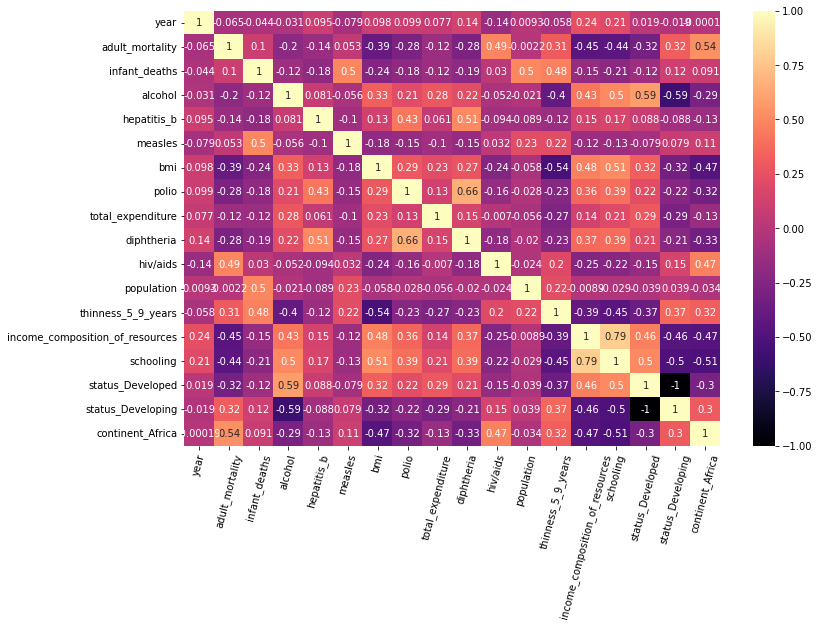

In [214]:
plt.figure(figsize=(12,8))
g = sns.heatmap(X_train.drop(columns=columns_drop).corr(), cmap='magma', annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=75)

In [215]:
# Define an Extended Isolation forest model
X_train.drop(columns=columns_drop, inplace=True)
df_X = h2o.H2OFrame(X_train)
df_y = h2o.H2OFrame(y_train)
eif = H2OExtendedIsolationForestEstimator(model_id = "eif.hex",
                                          ntrees = 100,
                                          sample_size = 256,
                                          extension_level = df_X.dim[1] - 1,
                                          seed = 15
                                          )

# Train Extended Isolation Forest
eif.train(x = df_X.columns, 
          training_frame = df_X)

# Calculate score
eif_result = eif.predict(df_X)

# Number in [0, 1] explicitly defined in Equation (1) from Extended Isolation Forest paper
# or in paragraph '2 Isolation and Isolation Trees' of Isolation Forest paper
anomaly_score = eif_result["anomaly_score"]

# Average path length  of the point in Isolation Trees from root to the leaf
mean_length = eif_result["mean_length"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
extendedisolationforest Model Build progress: |██████████████████████████████████| (done) 100%
extendedisolationforest prediction progress: |███████████████████████████████████| (done) 100%


In [216]:
evaluate(df_X, df_y, X_test, y_test, estimator='DT', anomaly_score, columns_drop_dt)

SyntaxError: ignored

In [ ]:
Life_Tree = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=15)
Life_Tree.fit(df_X[anomaly_score <= 0.6].as_data_frame(), df_y[anomaly_score <= 0.6].as_data_frame())
pred = Life_Tree.predict(X_test.drop(columns=columns_drop))
r2_score(y_test, pred)

# https://towardsdatascience.com/how-to-improve-the-accuracy-of-a-regression-model-3517accf8604
# https://towardsdatascience.com/statistics-supporting-linear-models-bfc24fb9781f
